In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("./Jcsop/reports/Cu Lα1,2.csv")
data = data.dropna(axis='columns')

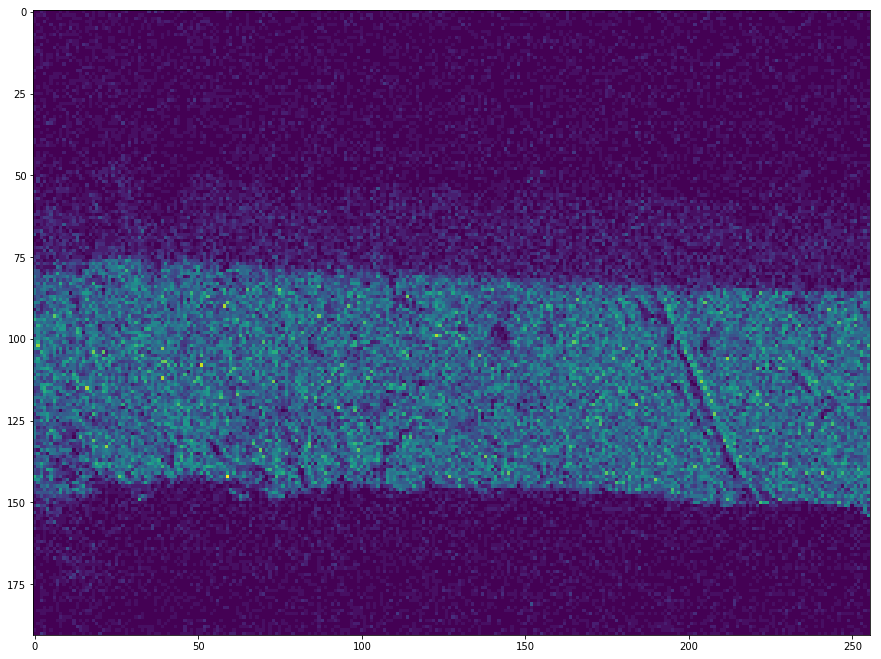

In [5]:
plt.figure(figsize=(15.,15.))
plt.imshow(data.values)
plt.savefig('histoimg.png', dpi=200)

In [6]:
hist, bins = np.histogram(data.values.ravel(), 20, [0,20])
hist, bins

(array([16697,  9868,  4101,  2140,  1764,  1852,  2095,  2055,  2038,
         1769,  1452,  1120,   736,   501,   337,   169,   100,    46,
           29,    20]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20.]))

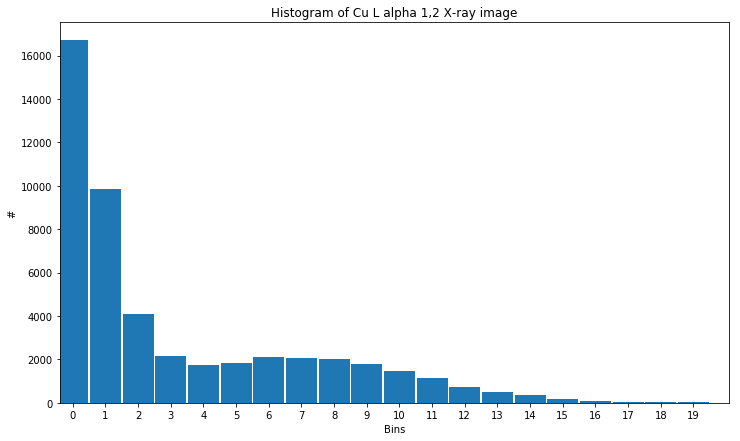

In [7]:
plt.figure(figsize=(12.,7.))
plt.title('Histogram of Cu L alpha 1,2 X-ray image')
plt.bar(range(20), hist, width=.95)
plt.xlabel('Bins')
plt.ylabel('#')
plt.xlim(-0.4,20.1)
plt.xticks(range(20))
plt.savefig('histo.png', dpi=200)

In [8]:
hist

array([16697,  9868,  4101,  2140,  1764,  1852,  2095,  2055,  2038,
        1769,  1452,  1120,   736,   501,   337,   169,   100,    46,
          29,    20])

In [9]:
deep_blue = hist[0] # 0  
mid_blue = np.sum(hist[3:6]) # 3:6
bright_blue = np.sum(hist[6:]) # 6:
deep_blue, mid_blue, bright_blue

(16697, 5756, 12467)

In [10]:
m_dark_blue = 165
m_mid_blue = 44
m_bright_blue = 126.5
# err 0.5, 22 width
print('M Values: ', m_dark_blue, m_mid_blue, m_bright_blue)
print('M Errs:', m_dark_blue*0.15, m_mid_blue*0.15, m_bright_blue*0.15)

print('\nValues: ', deep_blue, mid_blue, bright_blue)
print('Errs: ', deep_blue*.1, mid_blue*.1, bright_blue*.1)

M Values:  165 44 126.5
M Errs: 24.75 6.6 18.974999999999998

Values:  16697 5756 12467
Errs:  1669.7 575.6 1246.7


In [11]:
print('Integrated:\t' , deep_blue/deep_blue, .1*deep_blue/deep_blue, '\n',
                        mid_blue/deep_blue, .1*mid_blue/deep_blue, '\n',
                        bright_blue/deep_blue, .1*bright_blue/deep_blue), '\n'
print('Measured: \t', m_dark_blue/m_dark_blue,  .15*m_dark_blue/m_dark_blue, '\n',
                      m_mid_blue/m_dark_blue, .15*m_mid_blue/m_dark_blue, '\n',
                      m_bright_blue/m_dark_blue, .15*m_bright_blue/m_dark_blue)

Integrated:	 1.0 0.1 
 0.3447325866922202 0.03447325866922202 
 0.7466610768401509 0.07466610768401509
Measured: 	 1.0 0.15 
 0.26666666666666666 0.04 
 0.7666666666666667 0.11499999999999999


In [12]:
data= np.array([[1., 158., 31.],
         [1.12, 139., 29.],
         [1.26, 121., 24.],
         [1.41, 110., 22.],
         [1.59, 95., 20.],
          [1.78, 86.0, 16.0],
          [2., 73., 15.]])

In [13]:
area = data[:, 1]*data[:,2]

In [14]:
val = data[:, 0]

In [15]:
area_err = (data[:, 1]+1.)*(data[:,2]+1.) - area 
area_err += np.abs((data[:, 1]-1.)*(data[:,2]-1.) - area)

In [16]:
area_err = np.abs(area_err/2)

(array([189., 168., 145., 132., 115., 102.,  88.]),
 array([4898., 4031., 2904., 2420., 1900., 1376., 1095.]),
 array([1.  , 1.12, 1.26, 1.41, 1.59, 1.78, 2.  ]))

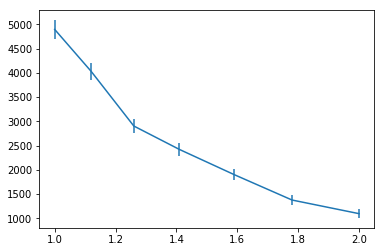

In [17]:
plt.errorbar(val, area, yerr=area_err)
area_err, area, val

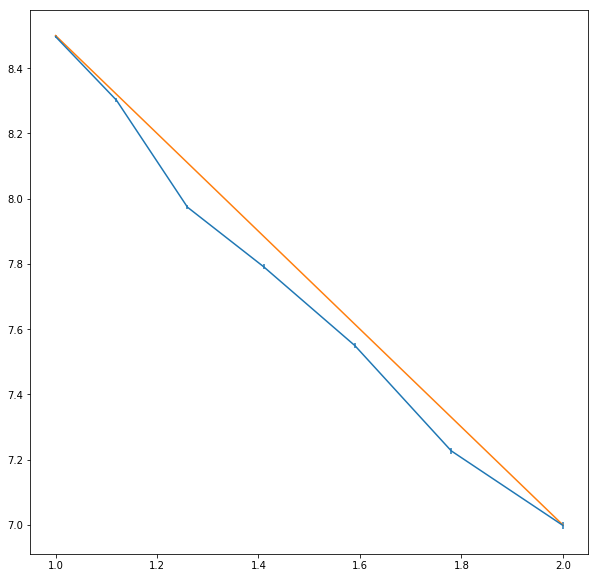

In [18]:
plt.figure(figsize=(10.,10.))
plt.errorbar(val, np.log(area), yerr=1./area_err)
plt.plot(np.linspace(1,2, 20), np.linspace(8.5, 7., 20))

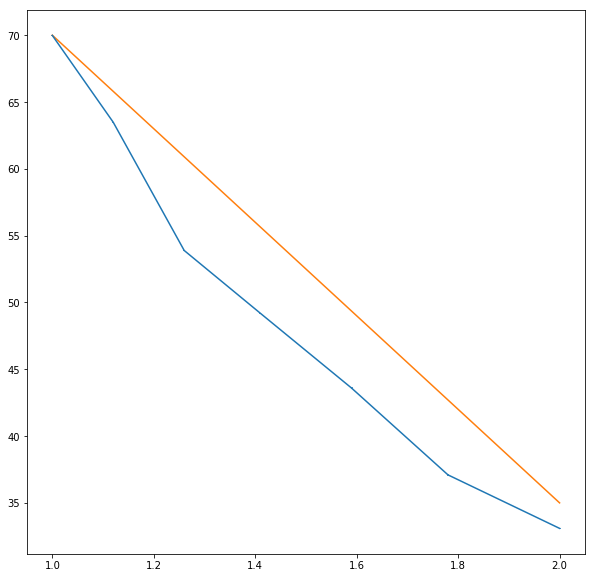

In [19]:
plt.figure(figsize=(10.,10.))
plt.errorbar(val, np.sqrt(area), yerr=.5/np.sqrt(area_err))
plt.plot(np.linspace(1,2, 20), np.linspace(70, 35, 20))

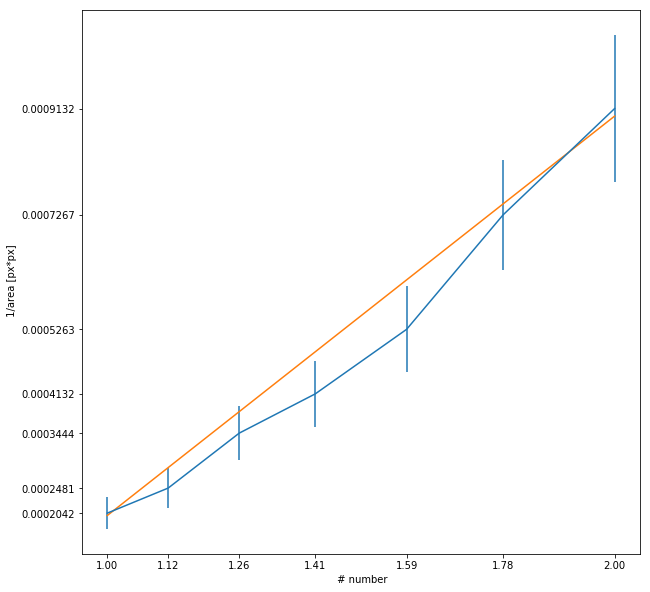

In [20]:
plt.figure(figsize=(10.,10.))
plt.errorbar(val, 1/area, yerr=-1/area_err**2)
plt.xlabel(' # number')
plt.ylabel(' 1/area [px*px]')
plt.xticks(val)
plt.yticks(1/area)
plt.plot(np.linspace(1,2, 20), np.linspace(0.0002, 0.0009, 20))
plt.savefig('egyperxfuggvenyhiba.png', dpi=200)

In [21]:
from scipy.optimize import curve_fit

In [22]:
def oneperx(x, a, b):
    return a/(x+b)

In [25]:
xdata = val
ydata = area
ydata_err = area_err

[ 1.76964782e+03 -6.49046005e-01]
[1.40578585e+02 3.53223182e-02]


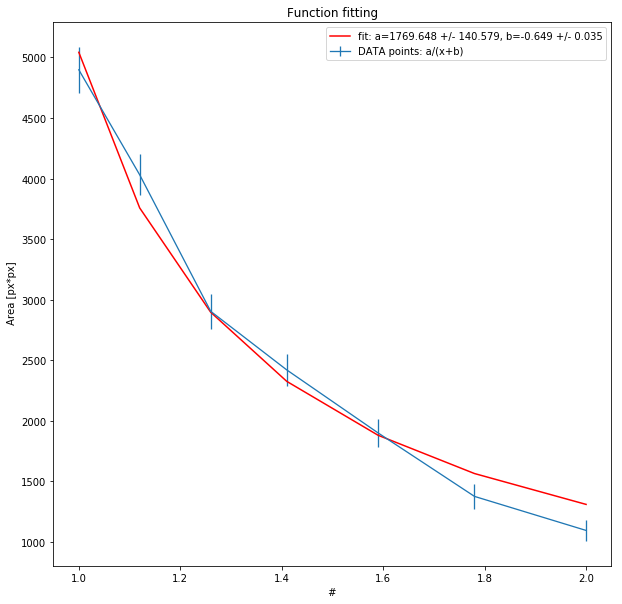

In [43]:
popt, pcov = curve_fit(oneperx, xdata, ydata)
print(popt)
perr = np.sqrt(np.diag(pcov))
print(perr)

plt.figure(figsize=(10.,10.))

plt.plot(xdata, oneperx(xdata, *popt), 'r-',
         label='fit: a=%5.3f +/- %5.3f, b=%5.3f +/- %5.3f' % (popt[0], perr[0], popt[1], perr[1]))
plt.errorbar(val, area, yerr=area_err, label='DATA points with function a/(x+b)', linewidth=1.3)
plt.legend()
plt.xlabel(" # ")
plt.ylabel(" Area [px*px]")
plt.title("Function fitting")
plt.savefig('egyperxfuggvenyhiba.png', dpi=200)